In [198]:
import time
import matplotlib.pyplot as plt
import torch
from src.model.base import NeuralNetwork
from src.model.layer import Input, FullyConnected
from src.model.loss import MeanSquaredError
from src.model.optimizer import SGD, Adam
from src.model.activation import Relu, Linear
from src.model.metric import R2Score

In [199]:
def func_quad(arg):
    return 0.5 * arg**2 + 2 * arg - 1

def func_linear(arg):
    return -1.0 * arg - 1

In [200]:
def func_quad_3d(arg_x, arg_y):
    return 0.2 * arg_x**2 + 0.2 * arg_y**2

def func_sin_plus_cos_3d(arg_x, arg_y):
    return torch.sin(arg_x) + torch.cos(arg_y)

In [201]:
def plot_func(x, y, title):
    plt.figure(figsize=(10, 8))
    plt.plot(x, y)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [202]:
def plot_func_3d(x, y, z, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x, y, z, cmap="viridis")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(X, Y)")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [203]:
def plot_loss(epoch, train_loss, test_loss, title):         
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_loss, color='r', label='Train')
    plt.plot(epoch, test_loss, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

In [204]:
def plot_r2_score(epoch, train_metric, test_metric, title):         
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_metric, color='r', label='Train')
    plt.plot(epoch, test_metric, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

In [205]:
def generate_train_test_data(func):
    
    x = torch.linspace(-5, 5, 100)

    train_data = []    

    for x_i in x:
        train_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    x = torch.linspace(-5, 5, 30)

    test_data = []

    for x_i in x:
        test_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    return train_data, test_data

In [206]:
def generate_train_test_data_3d(func_3d):
    
    x = torch.linspace(-5, 5, 50)
    y = torch.linspace(-5, 5, 50)
    x, y = torch.meshgrid(x, y, indexing="ij")

    train_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            train_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    x = torch.linspace(-5, 5, 30)
    y = torch.linspace(-5, 5, 30)
    x, y = torch.meshgrid(x, y, indexing="ij")

    test_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            test_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    return train_data, test_data

In [207]:
train_dataset, test_dataset = generate_train_test_data(func_linear)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=SGD(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 50

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/50, train loss: 2.1753, train R2 score: 0.4883, test loss: 0.7692, test R2 score: 0.8273
Epoch: 2/50, train loss: 0.2607, train R2 score: 0.9387, test loss: 0.0468, test R2 score: 0.9895
Epoch: 3/50, train loss: 0.0223, train R2 score: 0.9948, test loss: 0.0156, test R2 score: 0.9965
Epoch: 4/50, train loss: 0.0135, train R2 score: 0.9968, test loss: 0.0121, test R2 score: 0.9973
Epoch: 5/50, train loss: 0.0104, train R2 score: 0.9975, test loss: 0.01, test R2 score: 0.9978
Epoch: 6/50, train loss: 0.0085, train R2 score: 0.998, test loss: 0.0078, test R2 score: 0.9983
Epoch: 7/50, train loss: 0.0067, train R2 score: 0.9984, test loss: 0.0069, test R2 score: 0.9985
Epoch: 8/50, train loss: 0.0058, train R2 score: 0.9986, test loss: 0.0055, test R2 score: 0.9988
Epoch: 9/50, train loss: 0.0047, train R2 score: 0.9989, test loss: 0.0046, test R2 score: 0.999
Epoch: 10/50, train loss: 0.0041, train R2 score: 0.999, test loss: 0.0039, test R2 score: 0.9991
Epoch: 11/50, train loss

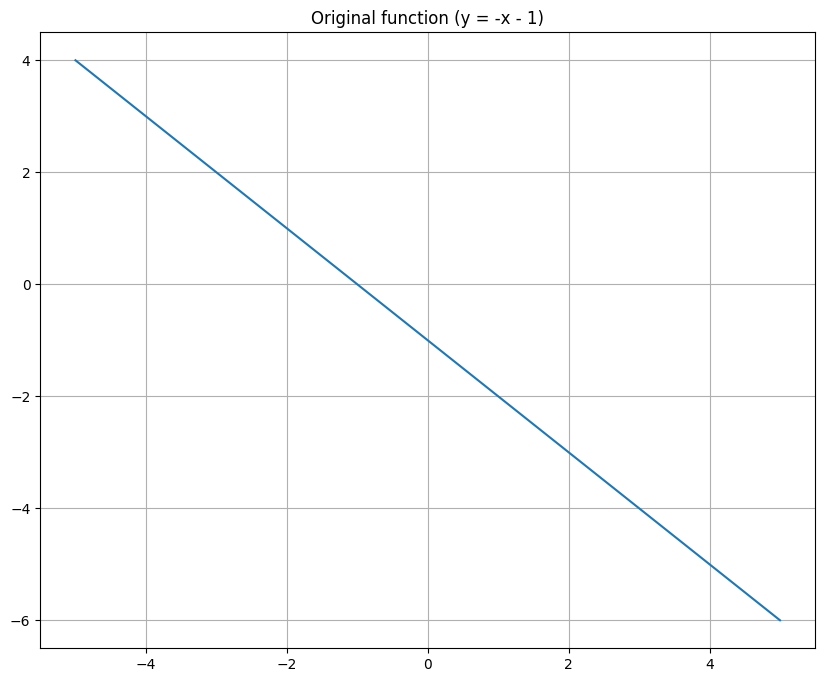

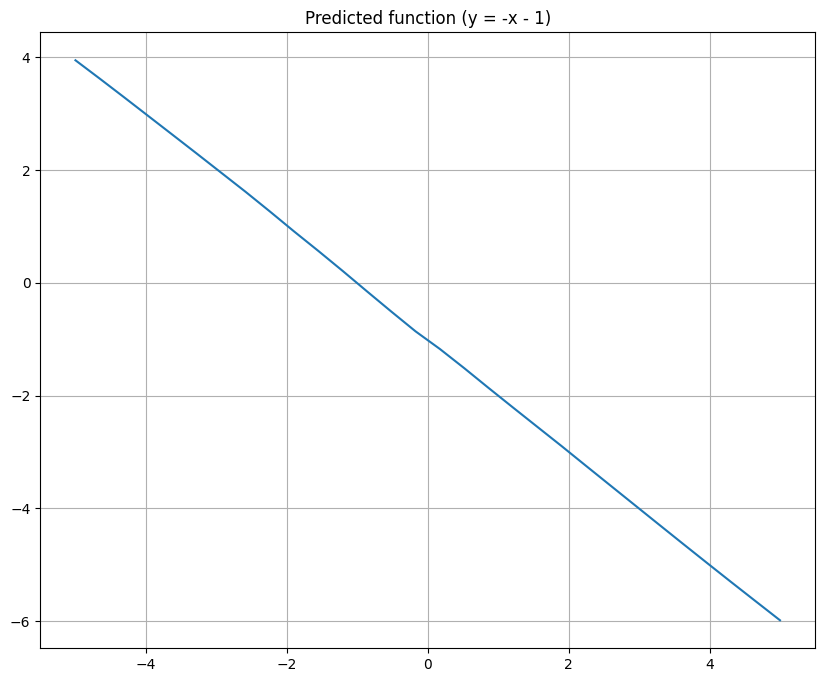

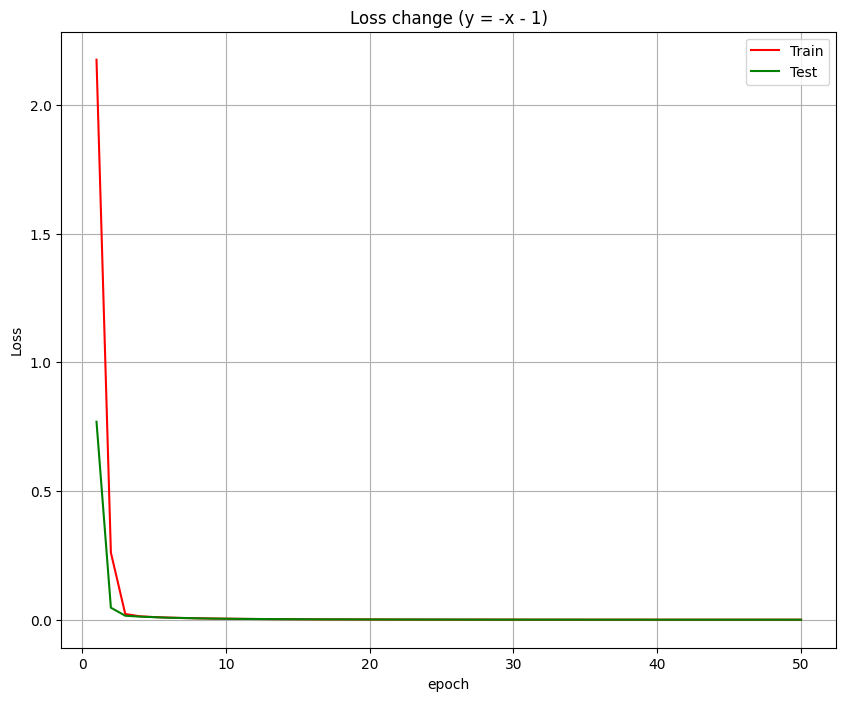

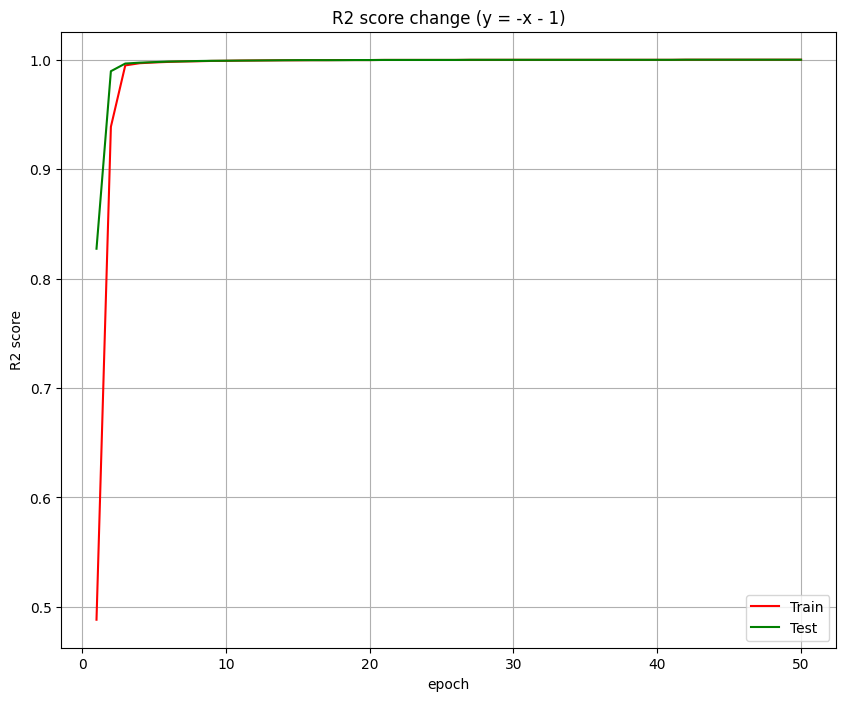

In [208]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function (y = -x - 1)",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function (y = -x - 1)"
)
plot_loss(epoch, train_loss, test_loss, 'Loss change (y = -x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = -x - 1)')

In [209]:
train_dataset, test_dataset = generate_train_test_data(func_quad)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=Adam(learning_rate=0.0005),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 30

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/30, train loss: 16.4228, train R2 score: 0.3222, test loss: 2.8833, test R2 score: 0.8879
Epoch: 2/30, train loss: 1.4775, train R2 score: 0.939, test loss: 0.7825, test R2 score: 0.9696
Epoch: 3/30, train loss: 0.5232, train R2 score: 0.9784, test loss: 0.3707, test R2 score: 0.9856
Epoch: 4/30, train loss: 0.4022, train R2 score: 0.9834, test loss: 0.2679, test R2 score: 0.9896
Epoch: 5/30, train loss: 0.2637, train R2 score: 0.9891, test loss: 0.3365, test R2 score: 0.9869
Epoch: 6/30, train loss: 0.25, train R2 score: 0.9897, test loss: 0.1483, test R2 score: 0.9942
Epoch: 7/30, train loss: 0.1746, train R2 score: 0.9928, test loss: 0.1481, test R2 score: 0.9942
Epoch: 8/30, train loss: 0.1102, train R2 score: 0.9955, test loss: 0.084, test R2 score: 0.9967
Epoch: 9/30, train loss: 0.0879, train R2 score: 0.9964, test loss: 0.0717, test R2 score: 0.9972
Epoch: 10/30, train loss: 0.1588, train R2 score: 0.9934, test loss: 0.0762, test R2 score: 0.997
Epoch: 11/30, train los

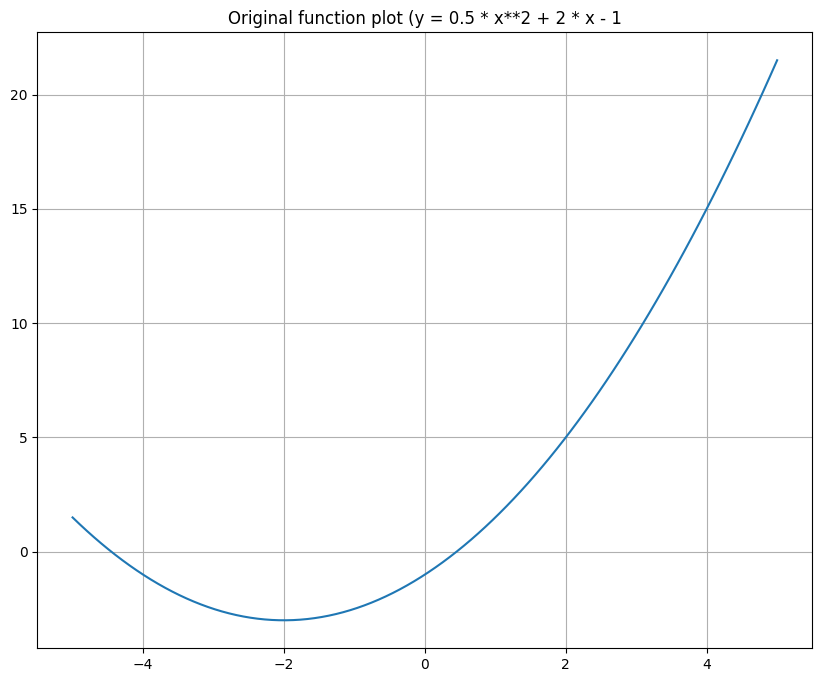

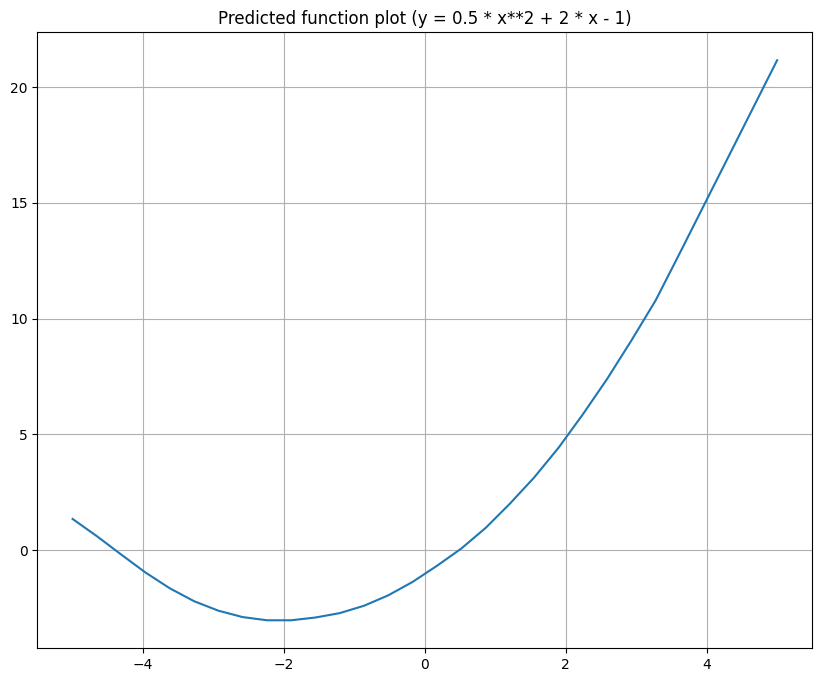

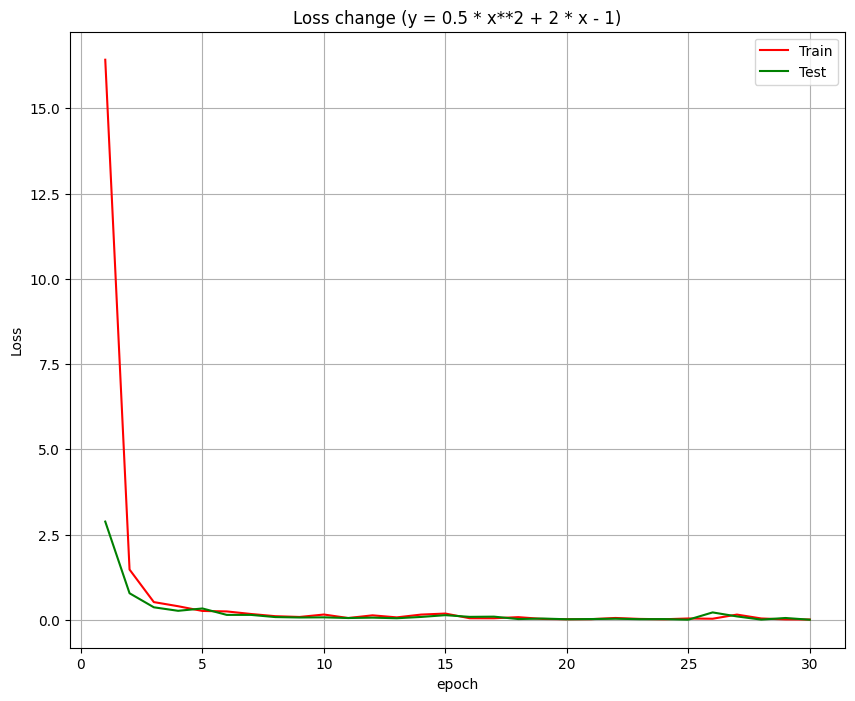

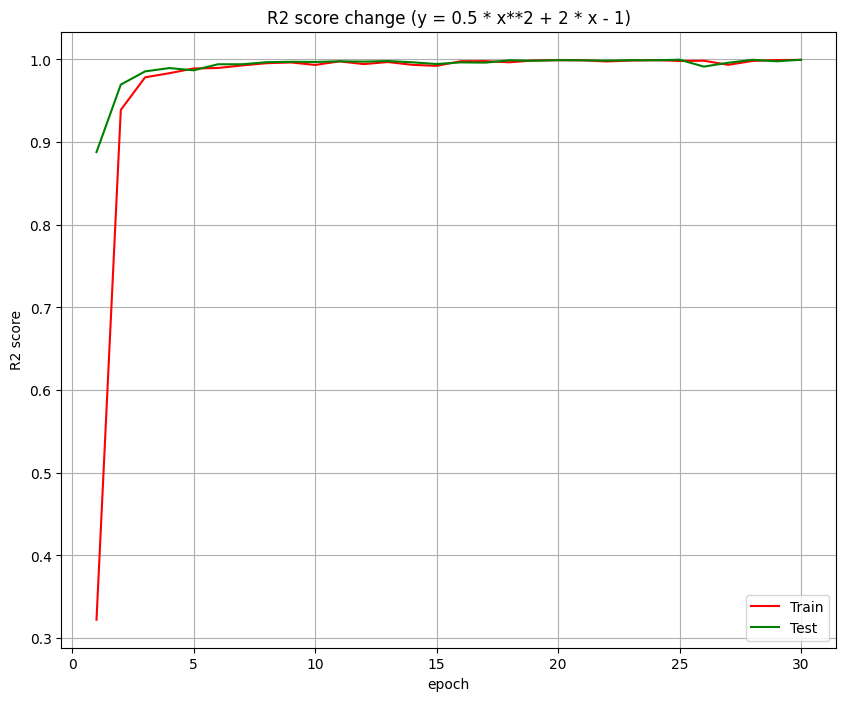

In [210]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function plot (y = 0.5 * x**2 + 2 * x - 1",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function plot (y = 0.5 * x**2 + 2 * x - 1)"
)
plot_loss(epoch, train_loss, test_loss, 'Loss change (y = 0.5 * x**2 + 2 * x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = 0.5 * x**2 + 2 * x - 1)')